# StudentName: Xavier Geoffrey Niroopen 
# Student ID: 23263806

### A. Import Python Modules and Dataset

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, FunctionTransformer, LabelEncoder, OrdinalEncoder, OneHotEncoder #needed for data preparation
from feature_engine.creation import CyclicalFeatures

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

#### Load the dataset

In [356]:
df = pd.read_csv("./bank.csv")
print('(number of examples, number of attributes): ', df.shape)

(number of examples, number of attributes):  (2000, 17)


### B. Exploratory Data Analysis and Data Preparation

In [357]:
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [358]:
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [359]:
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


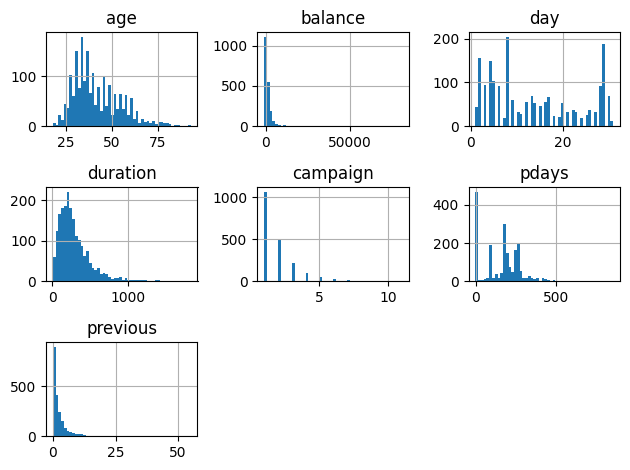

In [361]:
df.hist(bins=50)
plt.tight_layout()

<Axes: >

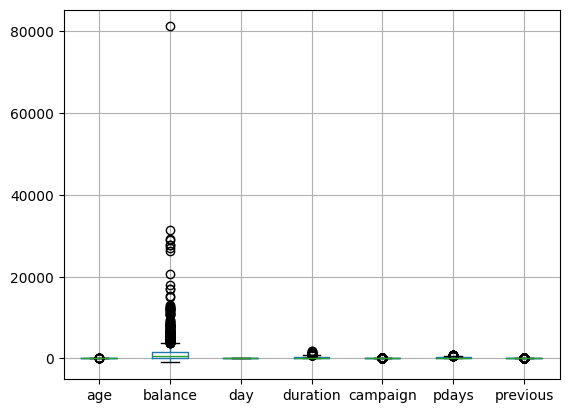

In [362]:
df.boxplot()

In [134]:
df_original = df
columns_to_drop = ['poutcome', 'contact', 'previous']

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   day         2000 non-null   int64  
 9   month       2000 non-null   object 
 10  duration    2000 non-null   int64  
 11  campaign    2000 non-null   int64  
 12  pdays       2000 non-null   int64  
 13  subscribed  2000 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 218.9+ KB


In [135]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
subscribed      0
dtype: int64

We have missing values in age, job and education. Fill these missing values using appropriate imputers and then scale them.

# Task 1 Clean the data and setup the pipeline.
## Extract the numerical and categorical features separately...

In [136]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64', 'int64'])

Based on the etivity1 analysis, I had filled the missing values for the student and retired jobs with their respective mean and other missing data with overll mean. Handling that 
with an Age custom imputer.

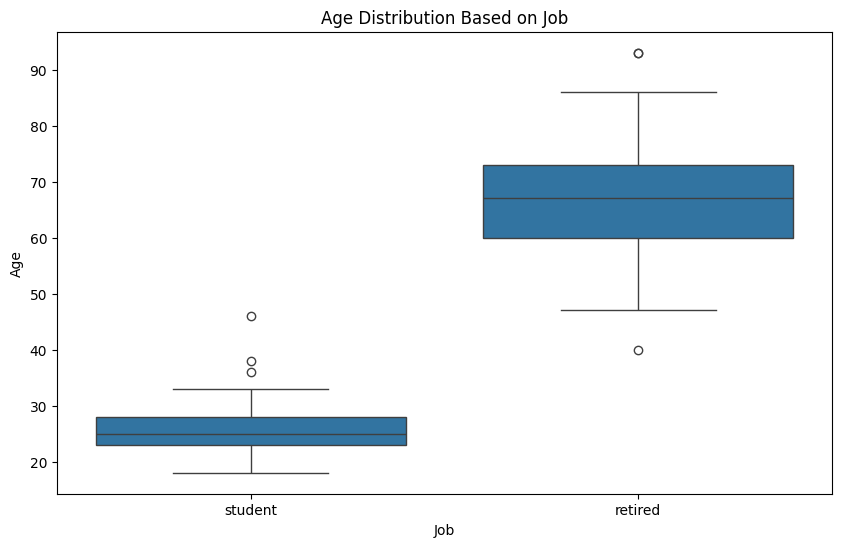

In [137]:
student_data = df[df['job'] == 'student']
retired_data = df[df['job'] == 'retired']

filtered_data = pd.concat([student_data, retired_data])
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='age', data=filtered_data)
plt.title('Age Distribution Based on Job')
plt.xlabel('Job')
plt.ylabel('Age')
plt.show()

In [138]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):

        self.student_mean_age = X.loc[X['job'] == 'student', 'age'].mean()
        self.retired_mean_age = X.loc[X['job'] == 'retired', 'age'].mean()

        self.mean_age = X.loc[~X['job'].isin(['student', 'retired']), 'age'].mean()
        
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy.loc[(X_copy['age'].isnull()) & (X_copy['job'] == 'student'), 'age'] = self.student_mean_age
        X_copy.loc[(X_copy['age'].isnull()) & (X_copy['job'] == 'retired'), 'age'] = self.retired_mean_age
        X_copy.loc[X_copy['age'].isnull(), 'age'] = self.mean_age
        
        return X_copy

age_imputer_pipeline = Pipeline(steps=[
    ('ageimputer', AgeImputer()),
    # ('agescaler', RobustScaler()),
])

In [215]:
transformed_numerical_features = age_imputer_pipeline.fit_transform(df)
transformed_numerical_features.isna().sum()


age             0
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
subscribed      0
dtype: int64

### **Balance Pipeline**

Balance has a lot of outliers. Treating them using IQR in a custom imputer.

In [210]:
class BalanceImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # Calculate bounds based on percentiles (if needed)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        
        # Fill NaN values in 'balance' column with mean of non-NaN values
        mean_balance = X_copy['balance'].mean()
        X_copy['balance'].fillna(mean_balance, inplace=True)
        
        return X_copy
    
# Define the pipeline
balance_imputer_pipeline = Pipeline(steps=[
    ('balanceimputer', BalanceImputer()),
    ('scaler', RobustScaler())
])

In [211]:
transformed_balance_feature = balance_imputer_pipeline.fit_transform(numerical_features)
np.isnan(transformed_balance_feature).sum()


C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\1330304594.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['balance'].fillna(mean_balance, inplace=True)


12

### **Day Month Pipeline**

Map the month to numeric and apply the cyclical imputer.

In [147]:
class MonthMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.month_map = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['month'] = X_copy['month'].map(self.month_map)
        return X_copy


class DayMonthImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        day_max = 31
        month_max = 12
        X_copy['day_sin'] = np.sin(2 * np.pi * X_copy['day'] / day_max)
        X_copy['day_cos'] = np.cos(2 * np.pi * X_copy['day'] / day_max)
        X_copy['month_sin'] = np.sin(2 * np.pi * X_copy['month'] / month_max)
        X_copy['month_cos'] = np.cos(2 * np.pi * X_copy['month'] / month_max)
        return X_copy.drop(columns=['day', 'month'])

day_month_imputer_pipeline = Pipeline(steps=[
    ('month_mapper', MonthMapper()),
    ('day_month_imputer', DayMonthImputer()),
    ('scaler', RobustScaler())
])

In [209]:
transformed_month_feature = day_month_imputer_pipeline.fit_transform(df[['day','month']])
transformed_month_feature[:1]
np.isnan(transformed_month_feature).sum()


0

### **Duration, pdays, campaign Pipeline**

In [150]:
duration_pdays_campaign_imputer_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [153]:
transformed_dur_pday_camp_feature = duration_pdays_campaign_imputer_pipeline.fit_transform(numerical_features)
transformed_dur_pday_camp_feature[:1]

array([[-0.76667698, -0.32636405, -1.3235651 ,  3.00213905,  0.06565025,
        -0.28010681]])

In [ ]:
numerical_features.columns

### Setup a preprocessor for age and day, month separately due to the dependency of categorical feature for these two numerical feature

In [162]:
age_preprocessor = ColumnTransformer( transformers=[#('age', age_imputer_pipeline, ['age', 'job']), #this passes the job data without treating
                                                    ('age',SimpleImputer(strategy="median"), ['age'])
                                                    ])

In [163]:
transformed_age = age_preprocessor.fit_transform(df[['age']])
transformed_age[:1]

array([[32.]])

In [ ]:
day_month_preprocessor = ColumnTransformer( transformers=[('day_month', day_month_imputer_pipeline, ['day', 'month']),])

In [164]:
transformed_day_month = day_month_preprocessor.fit_transform(df[['day', 'month']])
transformed_day_month[:1]

array([[-0.15531562,  0.50130506,  0.26794919, -0.3660254 ]])

### Setup the numerical preprocessor pipeline

In [200]:
numberical_preprocessor = ColumnTransformer( transformers=[
                                                         ('balance', balance_imputer_pipeline, ['balance']),
                                                         ('duration_pdays_campaign', duration_pdays_campaign_imputer_pipeline, ['duration', 'pdays', 'campaign'])
],remainder='passthrough')

In [ ]:
transformed_numerical_feature = numberical_preprocessor.fit_transform(pd.concat([numerical_features, df['month']], axis=1))
transformed_numerical_feature

### **Education Pipeline**

In [166]:
class EducationImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['education'].fillna('unknown', inplace=True)
        return X_copy

education_imputer_pipeline = Pipeline(steps=[
    ('imputer', EducationImputer()),
    ('encoder', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']]))
])

In [169]:
transformed_edu = education_imputer_pipeline.fit_transform(df[['education']])
transformed_edu[:5]

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\152452204.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['education'].fillna('unknown', inplace=True)


array([[2.],
       [1.],
       [1.],
       [1.],
       [1.]])

### **Job and marital Pipeline**

In [170]:
job_marital_imputer_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first',sparse_output=False)) 
])


In [171]:
encoded_data = job_marital_imputer_pipeline.fit_transform(df[['job', 'marital']])
encoded_data[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

### **Default, housing, subscribed and loan Pipeline**

In [172]:
default_housing_loan_imputer_pipeline = Pipeline(steps = [
        ('yes_no_mapper', FunctionTransformer(
            func = lambda X: X.replace({'yes': 1, 'no': 0}),
            validate = False)
        )]
)

In [173]:
encoded_data = default_housing_loan_imputer_pipeline.fit_transform(df[['default', 'housing', 'subscribed', 'loan']])
encoded_data[:1]

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\1290441321.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda X: X.replace({'yes': 1, 'no': 0}),


default  housing  subscribed  loan
0        0        1           0     0

In [177]:
categorical_features.drop(columns=['month'], axis=1, inplace=True)
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'subscribed'],
      dtype='object')

### Setup the categorical pipeline.

In [178]:
categorical_preprocessor = ColumnTransformer( transformers=[
                                                            ('job_marital', job_marital_imputer_pipeline, ['job', 'marital']),
                                                            ('education', education_imputer_pipeline, ['education']),
                                                            ('default_housing_loan', default_housing_loan_imputer_pipeline, ['default', 'housing', 'loan', 'subscribed'])
                                                            ],
                                                            remainder='passthrough'
)

In [179]:
transformed_categorical_feature = categorical_preprocessor.fit_transform(categorical_features)
transformed_categorical_feature

C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\152452204.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['education'].fillna('unknown', inplace=True)
C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\1290441321.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  func = lambda X: X.

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

### **Complete Transformer**

In [201]:
data_preprocessor_pipeline = ColumnTransformer( transformers=[('numerical',numberical_preprocessor, numerical_features.columns),
                                                              ('age',age_preprocessor, df[['age', 'job']].columns),
                                                              ('day_month',day_month_preprocessor, df[['day', 'month']].columns),
                                                              ('categorical',categorical_preprocessor,categorical_features.columns)
                                               ])
data_preprocessor_pipeline

ColumnTransformer(transformers=[('numerical',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('balance',
                                                                  Pipeline(steps=[('balanceimputer',
                                                                                   BalanceImputer()),
                                                                                  ('scaler',
                                                                                   RobustScaler())]),
                                                                  ['balance']),
                                                                 ('duration_pdays_campaign',
                                                                  Pipeline(steps=[('scaler',
                                                                                   StandardScaler())]),
                                                                  ['duration',
                                                                   'pdays',
                                                                   'campaign'])]),
                                 Index(['age', 'balance', 'day', 'duratio...
                                                                                   OrdinalEncoder(categories=[['primary',
                                                                                                               'secondary',
                                                                                                               'tertiary',
                                                                                                               'unknown']]))]),
                                                                  ['education']),
                                                                 ('default_housing_loan',
                                                                  Pipeline(steps=[('yes_no_mapper',
                                                                                   FunctionTransformer(func=<function <lambda> at 0x00000292C4675CF0>))]),
                                                                  ['default',
                                                                   'housing',
                                                                   'loan',
                                                                   'subscribed'])]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'subscribed'],
      dtype='object'))])

In [202]:
# Clean the data based on the created pipeline
processed_data = data_preprocessor_pipeline.fit_transform(df)


C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\2090788576.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['balance'].fillna(X_copy['balance'].mean(), inplace=True)
C:\Users\xjoseph\AppData\Local\Temp\ipykernel_38556\152452204.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [203]:
processed_data[:1]

array([[-0.11018711,  3.00213905, -0.28010681,  0.06565025, 32.        ,
         1.        , 32.        , -0.15531562,  0.50130506,  0.26794919,
        -0.3660254 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  2.        ,
         0.        ,  1.        ,  0.        ,  0.        ]])

I have issues in my data cleaning pipeline with NaN values. So I am using Moataz data cleaning pipeline for Kmeans study. Tried my best in debugging where the NaN lies but it is becoming complex to my understanding at this point of time. Apologies. I have modified the scaling to robust for all the columns.

In [216]:
#Take another copy of the original data frame
df2 = df_original

In [217]:
edu_map = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}
housing_map = {
    "yes": 0,
    "no": 1
}

loan_map = {
    "yes": 1,
    "no": 0
}

default_map = {
    "yes": 0,
    "no": 1
}
month_map = {
    "jan": 1,
    "feb": 2,
    "mar": 2,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

subscribed_map = {
    "yes": 1,
    "no": 0
}

# Transform categorical features into numerical features

def encode(df):
    df.loc[:,'education'] = df['education'].map(edu_map)
    df.loc[:,'housing'] = df['housing'].map(housing_map)
    df.loc[:,'loan'] = df['loan'].map(loan_map)
    df.loc[:,'default'] = df['default'].map(default_map)
    df.loc[:,'month'] = df['month'].map(month_map)
    df.loc[:,'subscribed'] = df['subscribed'].map(subscribed_map)
  
    return df

df2 = encode(df2)

In [218]:
categorical_columns=['job', 'marital']
cyclical_columns=['day','month']
numerical_columns=['age','education','default','balance','housing','loan','duration','campaign','pdays','subscribed']

In [286]:
categorical_pipeline = Pipeline(steps=[    
    ('one-hot',OneHotEncoder(sparse_output=False)),
    ('fill', SimpleImputer(strategy='most_frequent')),
    ('scale',RobustScaler())
])
cyclical_pipeline = Pipeline(steps=[
    ('cyclical',CyclicalFeatures(drop_original=False)),
    ('scale',RobustScaler())
])
numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',RobustScaler())
])

In [287]:
data_preprocessor_pipeline_2 = ColumnTransformer(transformers=[
    ('categorical_pipeline',categorical_pipeline,categorical_columns),
    ('cyclical_pipeline',cyclical_pipeline,cyclical_columns),
    ('numerical_pipeline',numerical_pipeline,numerical_columns)
    ],
    remainder='drop', #remainder=’drop’ to ignore other columns in a dataframe.
    n_jobs=-1)    #n_job = -1 to use all processors to run in parallel.

### Scatterplot Function (to be used below for visualising a clustering)

The function `clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [250]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## Task 2.1 K-Means Clustering

- k-Means clustering computed. 
- Two methods for finding the best value of k employed correctly.
- Clusters clearly characterised in a markdown cell.

In [288]:
k = 2

pipe = Pipeline(steps=[
    ('preprocess', data_preprocessor_pipeline_2), 
    ('kMeans', cluster.KMeans(n_clusters=k, n_init=10, max_iter=300))
])

In [289]:
processed_data = data_preprocessor_pipeline_2.fit_transform(df2)
processed_data[:1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        , -1.        ,  1.        ,
        -0.61111111, -0.2       , -0.15531562,  0.50130506, -0.33333333,
         1.        ,  0.        , -0.11018711, -1.        ,  0.        ,
         3.0944206 ,  1.        , -0.29101284, -0.5       ]])

Next, we fit the pipeline on the dataset to train a clustering model.

In [290]:
clustering_model = pipe.fit(df2)

In [291]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

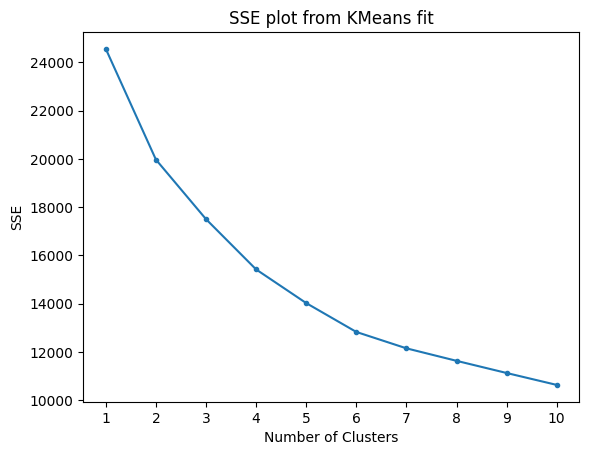

In [292]:
plt.plot(range(1, 11), sse, marker='.')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("SSE plot from KMeans fit")
plt.show()

### Elbow method:

In [293]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print(f"Elbow value for the above KMeans fit: {kl.elbow}")

Elbow value for the above KMeans fit: 4


### Silhouette method:

In [294]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(processed_data)
    score = silhouette_score(processed_data, kmeans.labels_)
    silhouette_coefficients.append(score)

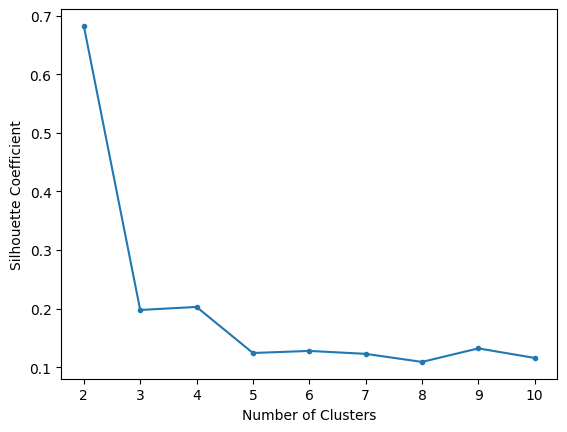

In [295]:
plt.plot(range(2, 11), silhouette_coefficients, marker='.')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

From the above Silhouette plot, **k=2** seems a good value.
Whereas, elbow method gives me **k=4**?!
So, 2 clusters seems optimal for the processed data. 

## Task 2.2 Compare KMeans with DBSCAN 

- DBSCAN attempted successfully and compared to k-Means. 
- Sufficient exploration of the parameters of the second clustering algorithm.

In [297]:
k = 2 #from the silhouette method
kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
kmeans.fit(processed_data)

kmeans_silhouette = silhouette_score(processed_data, kmeans.labels_).round(2)
print(f"Silhouette score using KMeans: {kmeans_silhouette}")

Silhouette score using KMeans: 0.68


In [308]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(processed_data)

dbscan_silhouette = silhouette_score(processed_data, dbscan.labels_).round (2)
print(f"Silhouette score using DBSCAN: {dbscan_silhouette}")

Silhouette score using DBSCAN: -0.16


In [313]:
num_dbscan_clusters = len(set(dbscan.labels_))
print(f"Number of unique labels for DBSCAN {num_dbscan_clusters}")

Number of unique labels for DBSCAN 3


Silhouette score of KMeans is higher than the DBSCAN

## Task 2.3 Expressive MDS or t-SNE visualisation

In [314]:
k = 4

MDS_pipe = Pipeline(steps=[
    ('preprocess', data_preprocessor_pipeline_2), 
    ('kMeans', cluster.KMeans(n_clusters=k, **kmeans_kwargs))
])

In [315]:
cluster_model_K_4 = MDS_pipe.fit(df2)

In [316]:
data_and_centers = np.r_[processed_data , cluster_model_K_4['kMeans'].cluster_centers_]

In [317]:
XYcoordinates = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(data_and_centers)
print("transformation complete")

transformation complete


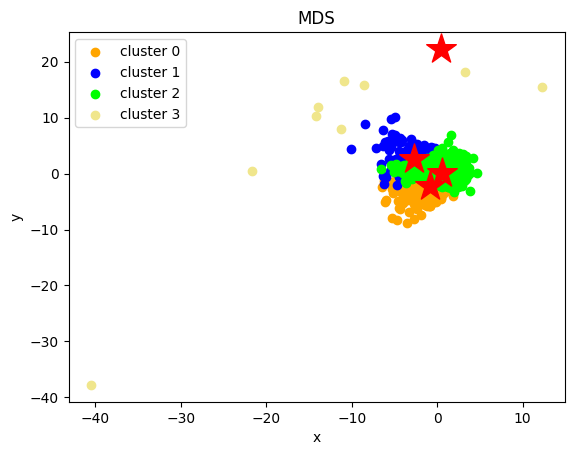

In [318]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=cluster_model_K_4['kMeans'].labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [319]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


In [320]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=cluster_model_K_4['kMeans'].labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

## Task 3.1 Run DBSCAN

Two important parameters are required for DBSCAN: epsilon (“eps”) and minimum points (“MinPts”). The parameter eps defines the radius of neighborhood around a point x. It’s called called the ϵ-neighborhood of x. The parameter MinPts is the minimum number of neighbors within “eps” radius.

In [321]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(processed_data)
distances, indices = nn_model.kneighbors(processed_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [322]:
kl_dbscan = KneeLocator(
    range(1,len(distances)+1), distances, curve="convex", direction="decreasing"
)

print(f"EPS value for the above Nearest Neigbhour fit: {kl_dbscan.elbow}")

EPS value for the above Nearest Neigbhour fit: 1


In [323]:
processed_data.shape

(2000, 29)

Compute the optimal *min_samples* for DBSCAN using silhouette score.

In [344]:
silhouette_coefficients_dbscan = []

for min_samples in range(6, 11):
    dbscan = DBSCAN(eps=1.0, min_samples=min_samples)
    dbscan.fit(processed_data)
    score = silhouette_score(processed_data, dbscan.labels_)
    silhouette_coefficients_dbscan.append(score)

In [346]:
plt.plot(range(6, 11), silhouette_coefficients_dbscan, marker='.')
plt.xticks(range(6, 11))
plt.xlabel("Number of min_samples")
plt.ylabel("Silhouette Coefficient")
plt.show()

From the above plot, **min_sample** seems to be **10**.

In [353]:
dbscan = DBSCAN(eps=1.0, min_samples=10)
cluster_model_dbscan = dbscan.fit(processed_data)

In [335]:
XYcoordinates_dbscan = manifold.MDS(n_components=2, normalized_stress='auto').fit_transform(processed_data)
print("transformation complete")

transformation complete


In [330]:
cluster_model_dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

## Task 3.2 Expressive MDS or t-SNE visualisation

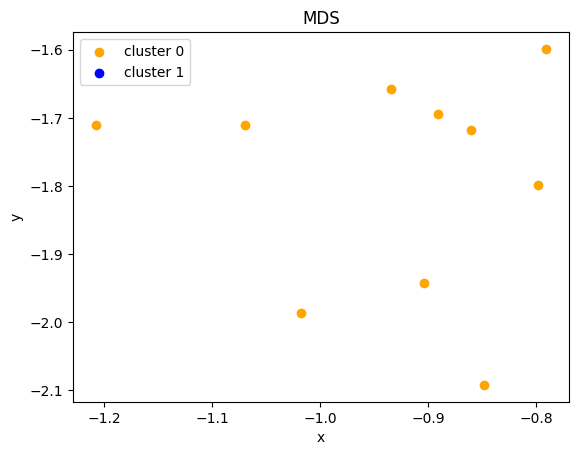

In [354]:
clustering_scatterplot(points=XYcoordinates_dbscan, 
                       labels=cluster_model_dbscan.labels_,
                       centers=None, 
                       title='MDS')

In [332]:
XYcoordinates_dbscan_tsne = manifold.TSNE(n_components=2).fit_transform(processed_data)
print("transformation complete")

transformation complete


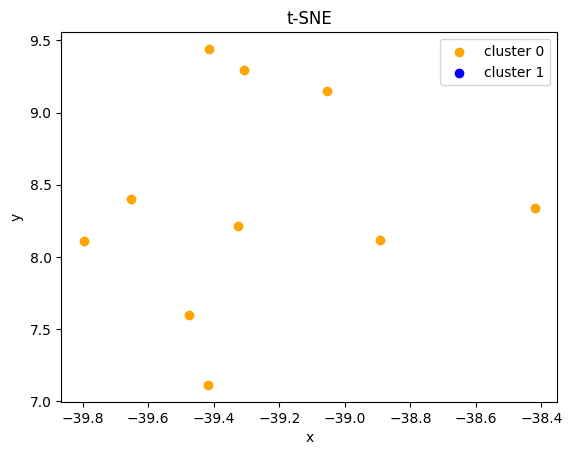

In [355]:
clustering_scatterplot(points=XYcoordinates_dbscan_tsne, 
                       labels=cluster_model_dbscan.labels_,
                       centers=None, 
                       title='t-SNE')

#### Conclusion

By looking at the plots above:
- k-means gives 4 clusters as the optimal cluster number
- DBSCAN gives only 2 clusters and the plot also looks wierd.
- Data cleaning has still issues.
- My original data pipeline has imputing issues due to the complexity of pipeline.
- I have used Moataz pipeline and changed the scaler to be Robust for all the columns.
- Overall, because of the data cleaning issues, unable to conclude from the above.